In [93]:
#Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import *

----
## Parâmetros

In [94]:
# Dimensões (m)
c = 0.23                # livro (comprimento)
l = 0.16                # livro (largura)
h = 0.02                # livro (altura)

# Áreas (m²)
As = l*h                 # livro (area de contato contra o ar)

# Volumes (m³)
v = l*h*c               # livro

# Densidades (kg/m³)
rho = 1500               # livro

# Massas (kg)
m = rho*v             # livro

g = 9.81

angle_l = 14

mic = tan(radians(angle_l))

----
## 1° Iteração

In [95]:
# 
def modelo1 (X, t, angle):
    
    rang = radians(angle)

    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    
    
    Nx = g*cos(rang)*sin(rang)
    Ny = g*cos(rang)**2
    Fatx = mic*g*cos(rang)**2
    Faty = mic*g*cos(rang)*sin(rang)
    # Farx =
    # Fary =
    
    dxdt = vx
    dydt = vy
    dvxdt = Nx - Fatx
    dvydt = Ny - Faty - g
    
    if angle < angle_l:
        return [0, 0, 0, 0]
    elif y < 0:
        if dxdt > 0:
            return [dxdt, 0, -mic*g, 0]
        else:
            return [0, 0, 0, 0]
    else:
        return [dxdt, dydt, dvxdt, dvydt]

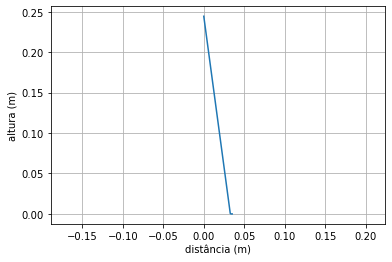

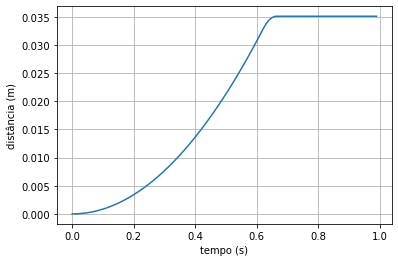

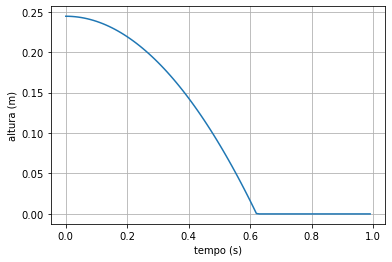

In [96]:
# if vx == 0:
        #     return [0, 0, 0, 0]
        # else:
        #     return [dxdt, 0, dvxdtc, 0]

t_lista = np.arange(0, 1, 0.01)

# Condições iniciais
angle = 15
x0 = [0, 0.244341, 0, 0]

# Resolução numérica
x = odeint(modelo1, x0, t_lista, args = (angle,))
listx = x[:,0]
listy = x[:,1]

# Variável que guarda gráfico
# modelo1, ax = plt.subplots()

# Plota gráfico somente para apresentação
plt.plot(listx, listy)
plt.axis('equal')
plt.title('')
plt.xlabel('distância (m)')
plt.ylabel('altura (m)')
plt.grid(True)
plt.show()
# Cria arquivo png com o gráfico no PC
# modelo1.savefig('0.modelo1.png',  format = 'png', dpi = 1200)

plt.plot(t_lista, listx)
plt.title('')
plt.xlabel('tempo (s)')
plt.ylabel('distância (m)')
plt.grid(True)
plt.show()

plt.plot(t_lista, listy)
plt.title('')
plt.xlabel('tempo (s)')
plt.ylabel('altura (m)')
plt.grid(True)
plt.show()

In [97]:
rang = radians(angle)

Nx = g*cos(rang)*sin(rang)
Ny = g*cos(rang)**2
Fatx = mic*g*cos(rang)**2
Faty = mic*g*cos(rang)*sin(rang)

print(Nx)
print(Ny)
print(Fatx)
print(Faty)

2.4524999999999997
9.152854605562673
2.2820629591189494
0.6114769269729007
